In [1]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
#suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

In [2]:
protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv", header = T, row.names = 1)
nrow(protein_coding)

[1] 19909

In [2]:
DLX1 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230913_Changuk_10X_interneuron_IGM/CC05/outs/filtered_feature_bc_matrix")
DAPI <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230913_Changuk_10X_interneuron_IGM/CC06/outs/filtered_feature_bc_matrix")
couptf2 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230719_Changuk_10xGE_interneuron_IGM/202304628_COUPTF2/outs/filtered_feature_bc_matrix")
tbr1 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230330_Changuk_10XGE_interneuron_IGM/8990_TBR1/outs/filtered_feature_bc_matrix")
df1 <- CreateSeuratObject(counts = DLX1, project = "DLX1", min.cells = 3, min.features = 100)
df2 <- CreateSeuratObject(counts = DAPI, project = "DAPI", min.cells = 3, min.features = 100)
df3 <- CreateSeuratObject(counts = couptf2, project = "COUPTF2", min.cells = 3, min.features = 100)
df4 <- CreateSeuratObject(counts = tbr1, project = "TBR1", min.cells = 3, min.features = 100)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [3]:
# # # Loading raw data with CellRanger output.
# tbr1 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230330_Changuk_10XGE_interneuron_IGM/8990_TBR1/outs/filtered_feature_bc_matrix")
# #Ctrl8718 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230330_Changuk_10XGE_interneuron_IGM/8990_DLX1/outs/filtered_feature_bc_matrix")
# couptf2 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230719_Changuk_10xGE_interneuron_IGM/202304628_COUPTF2/outs/filtered_feature_bc_matrix")
# #couptf2_2 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230118_Changuk_10XGE_Interneuron_IGM/20221005_COUPTFII/outs/filtered_feature_bc_matrix")
# # dlx1_1 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230118_Changuk_10XGE_Interneuron_IGM/20221207_DLX1/outs/filtered_feature_bc_matrix")
# # dlx1_2 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230330_Changuk_10XGE_interneuron_IGM/8990_DLX1/outs/filtered_feature_bc_matrix")
# # dlx1_3 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230609_Changuk_Interneuron_10XGE_IGM/8990_sec2_DLX1/outs/filtered_feature_bc_matrix")
# # dlx1_4 <- Read10X(data.dir = "/projects/ps-gleesonlab8/Uniformly_processed_data/20230719_Changuk_10xGE_interneuron_IGM/202304621_DLX1/outs/filtered_feature_bc_matrix")


# df1 <- CreateSeuratObject(counts = tbr1, project = "TBR1", min.cells = 3, min.features = 100)
# # saveRDS(df1, "TBR1.rds") 
# # df1 <- CreateSeuratObject(counts = Ctrl8718, project = "DLX1", min.cells = 3, min.features = 100)
# # saveRDS(df1, "DLX1.rds")
# df2 <- CreateSeuratObject(counts = couptf2, project = "COUPTF2", min.cells = 3, min.features = 100)
# #saveRDS(df1, "COUPTF2.rds")
# #df1 <- CreateSeuratObject(counts = couptf2_2, project = "COUPTF2_2", min.cells = 3, min.features = 100)
# # saveRDS(df1, "COUPTF2_2.rds")
# df3 <- CreateSeuratObject(counts = dlx1_1, project = "DLX1_1", min.cells = 3, min.features = 100)
# df4 <- CreateSeuratObject(counts = dlx1_2, project = "DLX1_2", min.cells = 3, min.features = 100)
# df5 <- CreateSeuratObject(counts = dlx1_3, project = "DLX1_3", min.cells = 3, min.features = 100)
# df6 <- CreateSeuratObject(counts = dlx1_4, project = "DLX1_4", min.cells = 3, min.features = 100)

# #saveRDS(df1, "DLX1.rds")

In [4]:
df7<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8553.rds")
df8<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8718.rds")

In [5]:
#merged<-merge(df1, y=c(df2,df3,df4,df7,df8), add.cell.id=c("DLX1","DAPI","COUPTF2","TBR1","CTRL1","CTRL2"), project = "input")
merged<-merge(df1, y=c(df2,df3,df4,df7,df8), add.cell.id=c("DLX1","DAPI","COUPTF2","TBR1","CTRL1","CTRL2"), project = "input")

In [6]:
#saveRDS(merged,"SeuratObject.rds")

In [7]:
#df0<-readRDS("SeuratObject.rds")

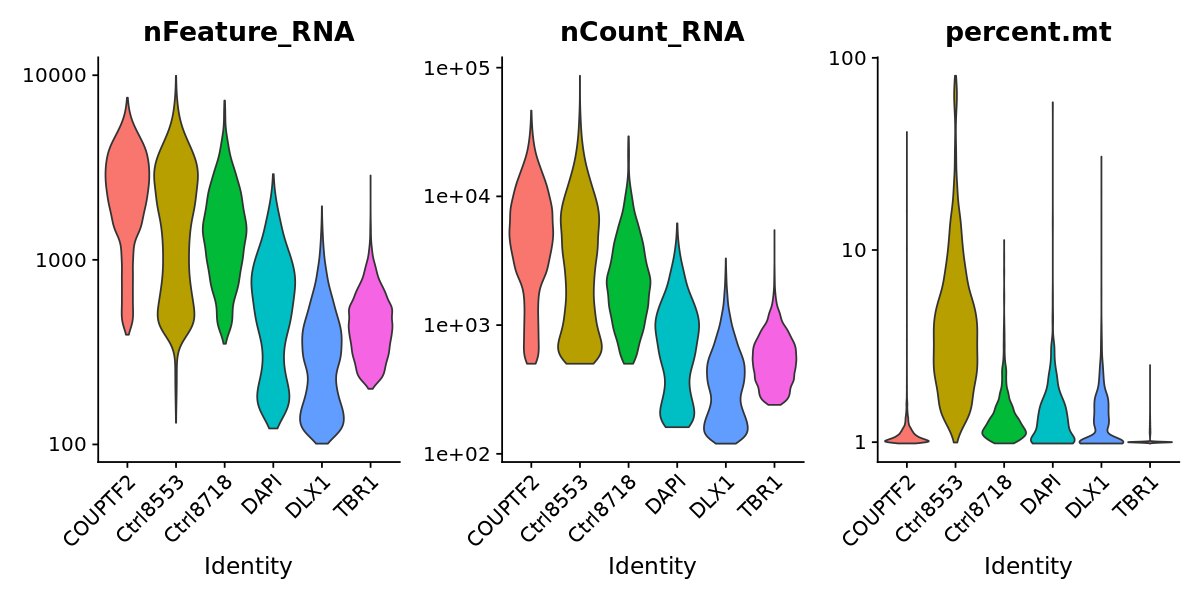

In [8]:
df0<- merged
df0[["percent.mt"]] <- PercentageFeatureSet(df0, pattern = "^MT-")

# check raw data quality
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0,log = T)

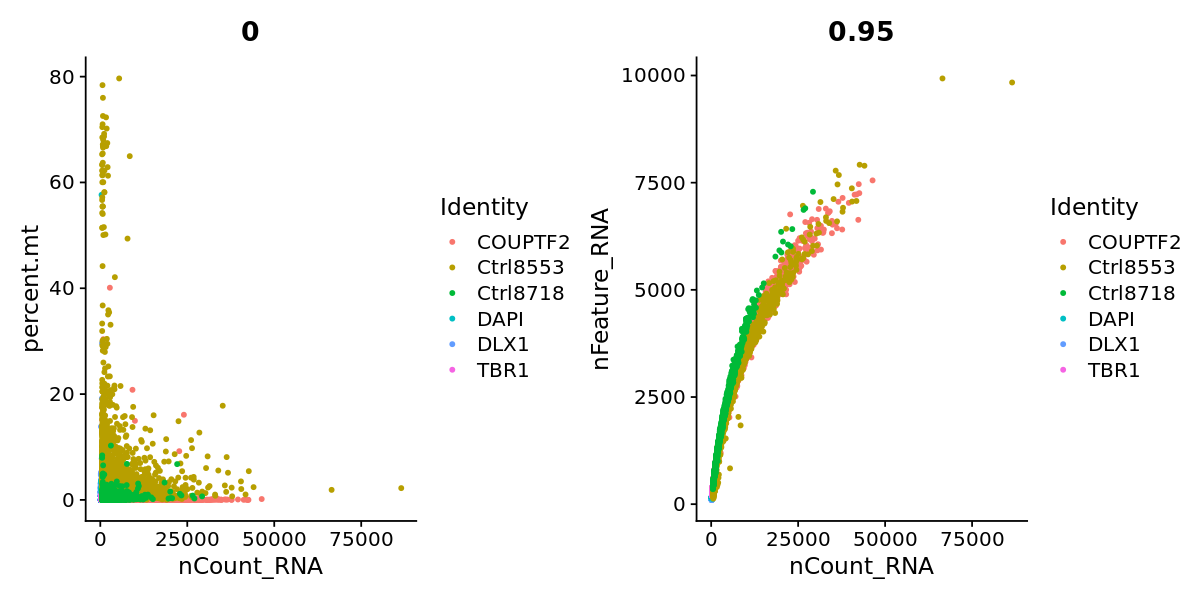

In [9]:
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

An object of class Seurat 
15896 features across 12024 samples within 1 assay 
Active assay: RNA (15896 features, 0 variable features)


 COUPTF2 Ctrl8553 Ctrl8718     DAPI     DLX1     TBR1 
    2330     1568     1480      510     1267     4869 

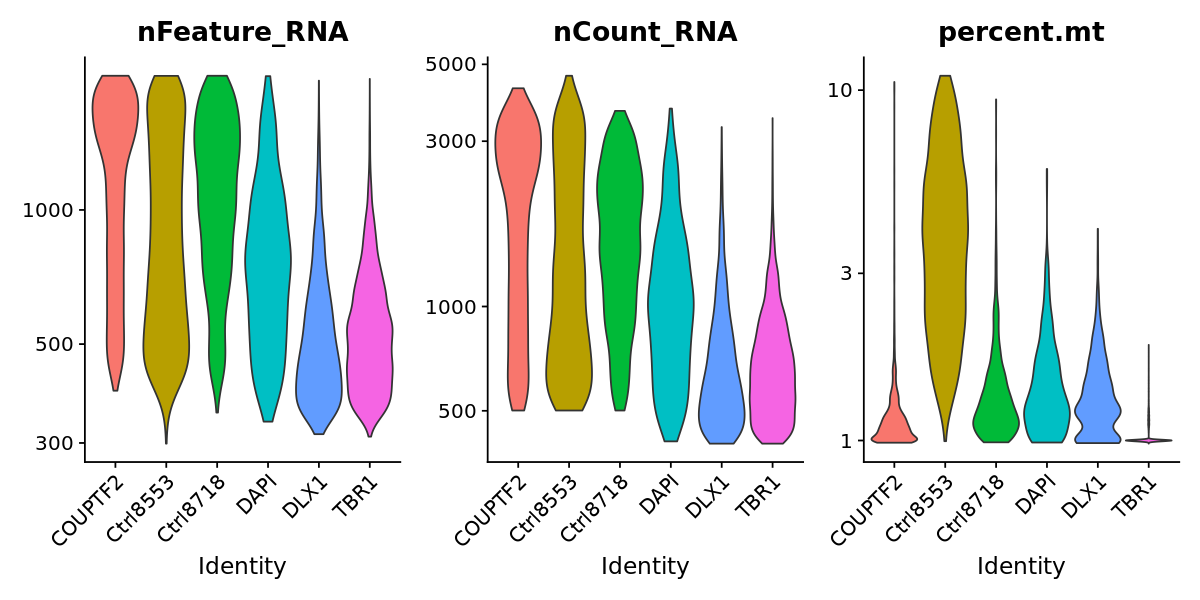

In [10]:
# cut off setup for QC
df0 <- subset(df0, subset = nCount_RNA > 400 & nFeature_RNA<2000 & percent.mt < 10)
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0,log = T)

# Take protein coding regions
protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv", header = T, row.names = 1)
df0 <- df0[protein_coding$gene_name,]

df0
table(Idents(df0))

In [11]:
set.seed(122)
#  df0_TBR1<-df0@meta.data[df0@meta.data$orig.ident %in% c("DLX1_3"),]
#  df0@meta.data$randomsampling[rownames(df0@meta.data) %in% rownames(df0_TBR1[sample(1:as.integer(table(Idents(df0))[6]), 100, replace = TRUE),])]<-'sampled'
# df0_TBR1<-df0@meta.data[df0@meta.data$orig.ident %in% c("TBR1"),]
# df0@meta.data$randomsampling[rownames(df0@meta.data) %in% rownames(df0_TBR1[sample(1:as.integer(table(Idents(df0))[8]), 100, replace = TRUE),])]<-'sampled'
df0_COUPTF2<-df0@meta.data[df0@meta.data$orig.ident %in% c("COUPTF2"),]
df0@meta.data$randomsampling[rownames(df0@meta.data) %in% rownames(df0_COUPTF2[sample(1:as.integer(table(Idents(df0))[1]), 500, replace = TRUE),])]<-'sampled'
df0_DLX1<-df0@meta.data[df0@meta.data$orig.ident %in% c("DLX1"),]
df0@meta.data$randomsampling[rownames(df0@meta.data) %in% rownames(df0_DLX1[sample(1:as.integer(table(Idents(df0))[5]), 500, replace = TRUE),])]<-'sampled'
df0_TBR1<-df0@meta.data[df0@meta.data$orig.ident %in% c("TBR1"),]
df0@meta.data$randomsampling[rownames(df0@meta.data) %in% rownames(df0_TBR1[sample(1:as.integer(table(Idents(df0))[6]), 500, replace = TRUE),])]<-'sampled'

In [12]:
df0<-subset(df0, randomsampling=='sampled' | orig.ident %in% c('DAPI','Ctrl8718'))

In [13]:
table(Idents(df0))


 COUPTF2 Ctrl8718     DAPI     DLX1     TBR1 
     440     1480      510      422      470 

In [ ]:
unique(sapply(X = strsplit(colnames(df0), split = "_"), FUN = "[", 1))
df0.list <- SplitObject(df0, split.by = "orig.ident")
df0.list <- lapply(X = df0.list, FUN = function(x){
  x <- NormalizeData(x) 
  x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 3000)
})
features <- SelectIntegrationFeatures(object.list = df0.list)

In [ ]:
df0.anchors <- FindIntegrationAnchors(object.list = df0.list, anchor.features = features)

In [ ]:
df0.combined <- IntegrateData(anchorset = df0.anchors)

In [24]:
DefaultAssay(df0.combined) <- "integrated"
df0.combined <- ScaleData(df0.combined, verbose = FALSE)
df0.combined <- RunPCA(df0.combined, npcs = 30, verbose = FALSE)
df0.combined <- RunUMAP(df0.combined, reduction = "pca", dims = 1:30)
df0.combined <- FindNeighbors(df0.combined, reduction = "pca", dims = 1:30)
df0.combined <- FindClusters(df0.combined, resolution = 0.2)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:29:50 UMAP embedding parameters a = 0.9922 b = 1.112

10:29:50 Read 9308 rows and found 30 numeric columns

10:29:50 Using Annoy for neighbor search, n_neighbors = 30

10:29:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:29:51 Writing NN index file to temp file /tmp/RtmpP6Qd4M/file7540380129b9

10:29:51 Searching Annoy index using 1 thread, search_k = 3000

10:29:54 Annoy recall = 100%

10:29:55 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9308
Number of edges: 355429

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9625
Number of communities: 14
Elapsed time: 1 seconds


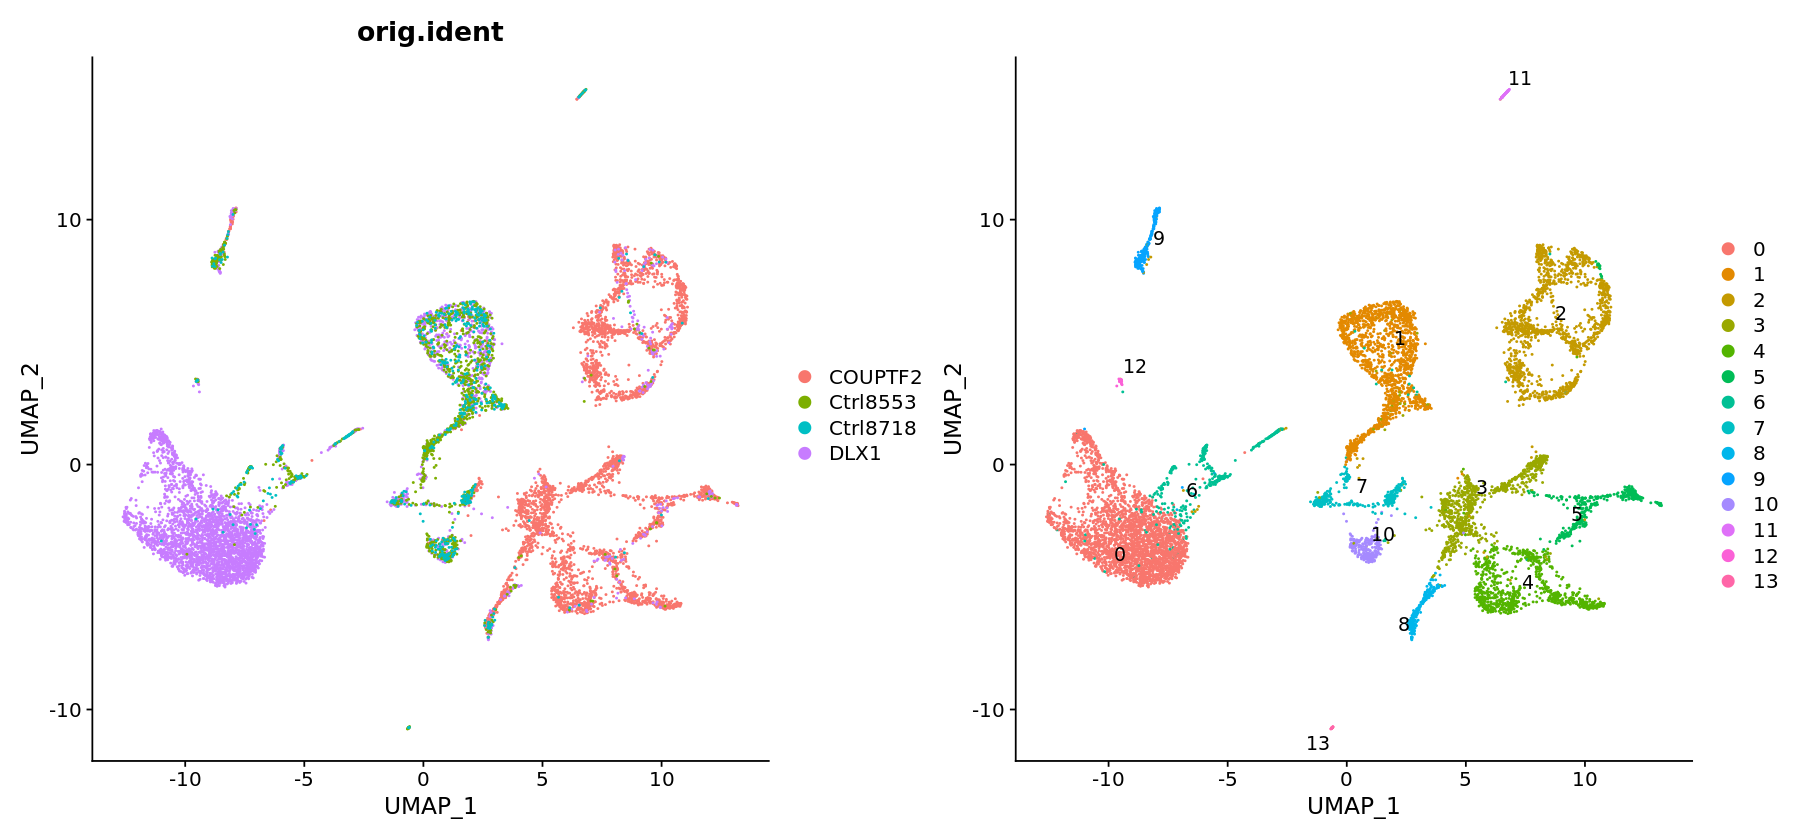

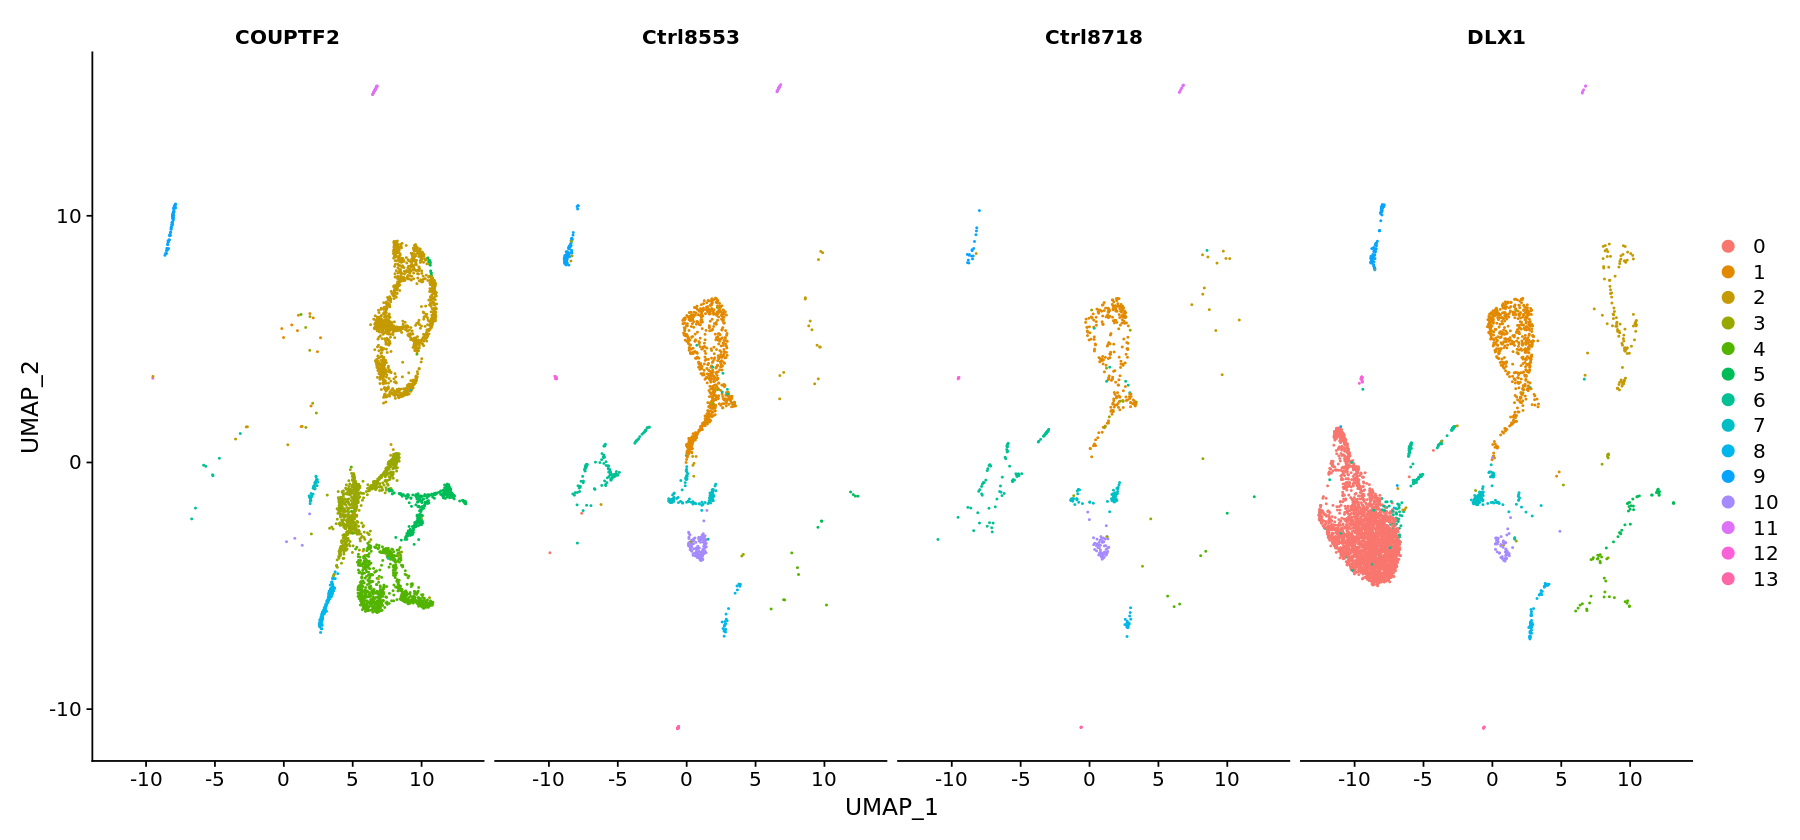

In [25]:
p1 <- DimPlot(df0.combined, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(df0.combined, reduction = "umap", label = TRUE, repel = TRUE)
options(repr.plot.width=15, repr.plot.height=7)
p1 + p2
options(repr.plot.width=15, repr.plot.height=7)
DimPlot(df0.combined, reduction = "umap", split.by = "orig.ident")

# RNA assay with ctrl and cell type labeling

In [14]:
df1<-subset(df0)

In [15]:
plan(strategy = "multicore")
df1 <- NormalizeData(object = df1, 
                      normalization.method = "LogNormalize", 
                      margin = 2, 
                     scale.factor = 10000)
plan(strategy = "sequential")

Warning message:
“Transformation introduced infinite values in continuous x-axis”


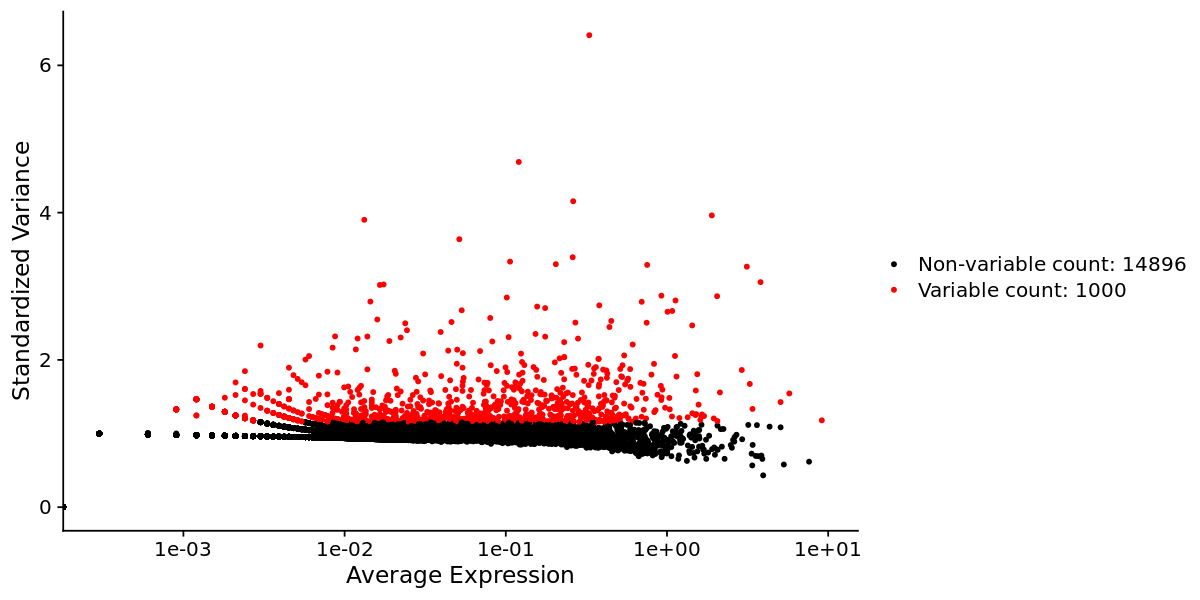

In [16]:
plan(strategy = "multicore")
df1 <- FindVariableFeatures(object = df1,
                            selection.method = "vst", 
                            nfeatures = 1000)
plan(strategy = "sequential")
hvg <- VariableFeatures(df1)
top10 <- head(VariableFeatures(df1), 10)
plot1 <- VariableFeaturePlot(df1)
plot1

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


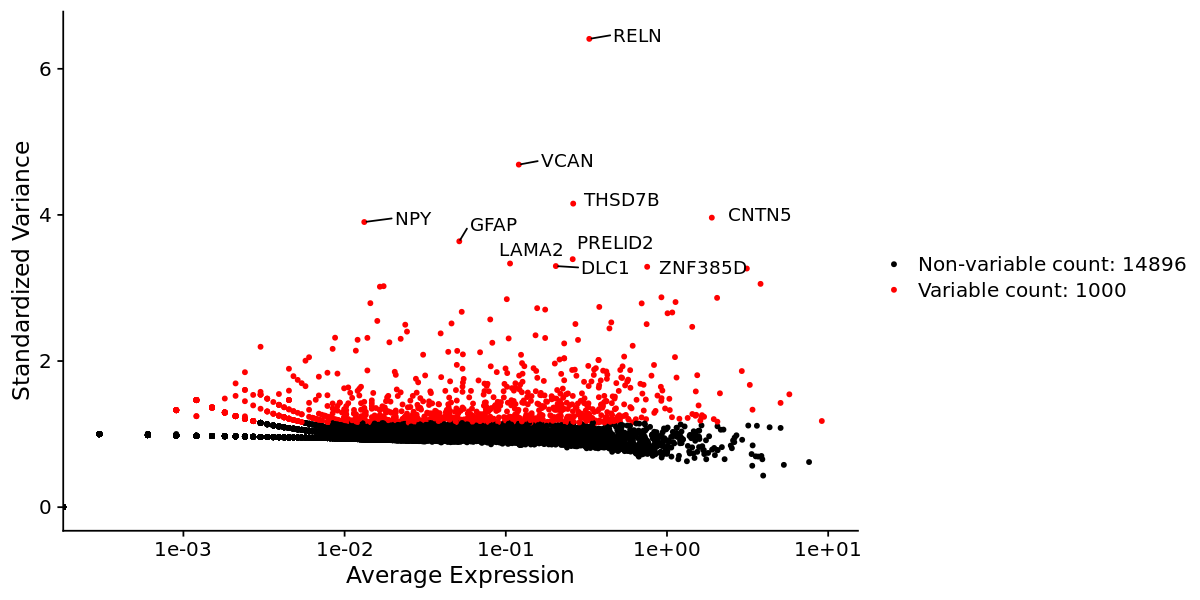

In [17]:
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [18]:
plan(strategy = "multicore")
df1 <- ScaleData(object = df1, 
                 features = hvg, 
                 vars.to.regress = c('nCount_RNA','nFeature_RNA'),
                 block.size = 20000,
                 verbose = F)
plan(strategy = "sequential")

In [19]:
df1 <- RunPCA(df1, npcs = 30, ndims.print = 1:5, nfeatures.print = 10)

PC_ 1 
Positive:  SLC22A10, KCNIP4, RALYL, KIAA1211L, SV2B, MLIP, CDH22, PDE1A, HS3ST4, CADPS2 
Negative:  ADARB2, ERBB4, PLD5, GRIK2, GRIK1, RGS12, NPAS3, GALNTL6, ZNF385D, ZNF536 
PC_ 2 
Positive:  CNTNAP2, NRG3, CNTN5, ROBO2, KCNQ5, GRIK2, FGF14, FSTL5, MACROD2, GALNTL6 
Negative:  VCAN, CHD7, DOCK5, NCKAP5, CECR2, PTPRZ1, HIP1, DOCK1, HIF3A, RFTN2 
PC_ 3 
Positive:  CNDP1, CLDN11, RNF220, CTNNA3, ST18, CLMN, MOG, ENPP2, DAAM2, FRMD4B 
Negative:  VCAN, PTPRZ1, COL9A1, XYLT1, LHFPL3, TNR, PCDH15, MYT1, CMYA5, MMD2 
PC_ 4 
Positive:  DSCAM, KCNIP4, GRM7, GALNT13, NCAM2, DOCK10, ADARB2, VCAN, NLGN1, MEGF11 
Negative:  NXPH1, SLC1A3, SPARCL1, UTRN, ATP1A2, SOX6, TPD52L1, RBMS3, AHNAK, GNA14 
PC_ 5 
Positive:  NXPH1, SOX6, PTPRT, FRMD4B, CNDP1, MYO16, ASTN2, MPPED1, SGCZ, TMEM132C 
Negative:  RYR3, SLC1A3, ATP1A2, TPD52L1, GNA14, PDE7B, GPC5, SLC25A18, SLC1A2, RGS12 



Warning message in ElbowPlot(df1, ndims = 100):
“The object only has information for 30 reductions”


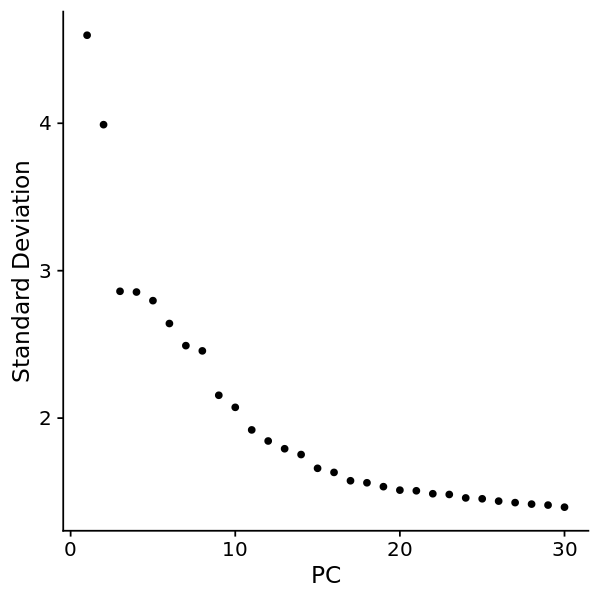

In [20]:
options(repr.plot.width=5, repr.plot.height=5)
ElbowPlot(df1, ndims = 100)

In [21]:
plan(strategy = "multicore")
df1 <- RunUMAP(df1,
               n.neighbors = 70,
               min.dist = 0.2,
               #umap.method = "umap-learn",
               metric = 'cosine',
               n.components = 2, 
               dims = c(1:10), 
               # n.epochs = 100,
               verbose = F)
plan(strategy = "sequential")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [22]:
df1 <- FindNeighbors(object = df1, k.param = 10, reduction = 'pca', dims = 1:10, verbose = F)

In [23]:
df1 <- FindClusters(object = df1, resolution = 0.1)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3322
Number of edges: 48188

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9649
Number of communities: 9
Elapsed time: 0 seconds


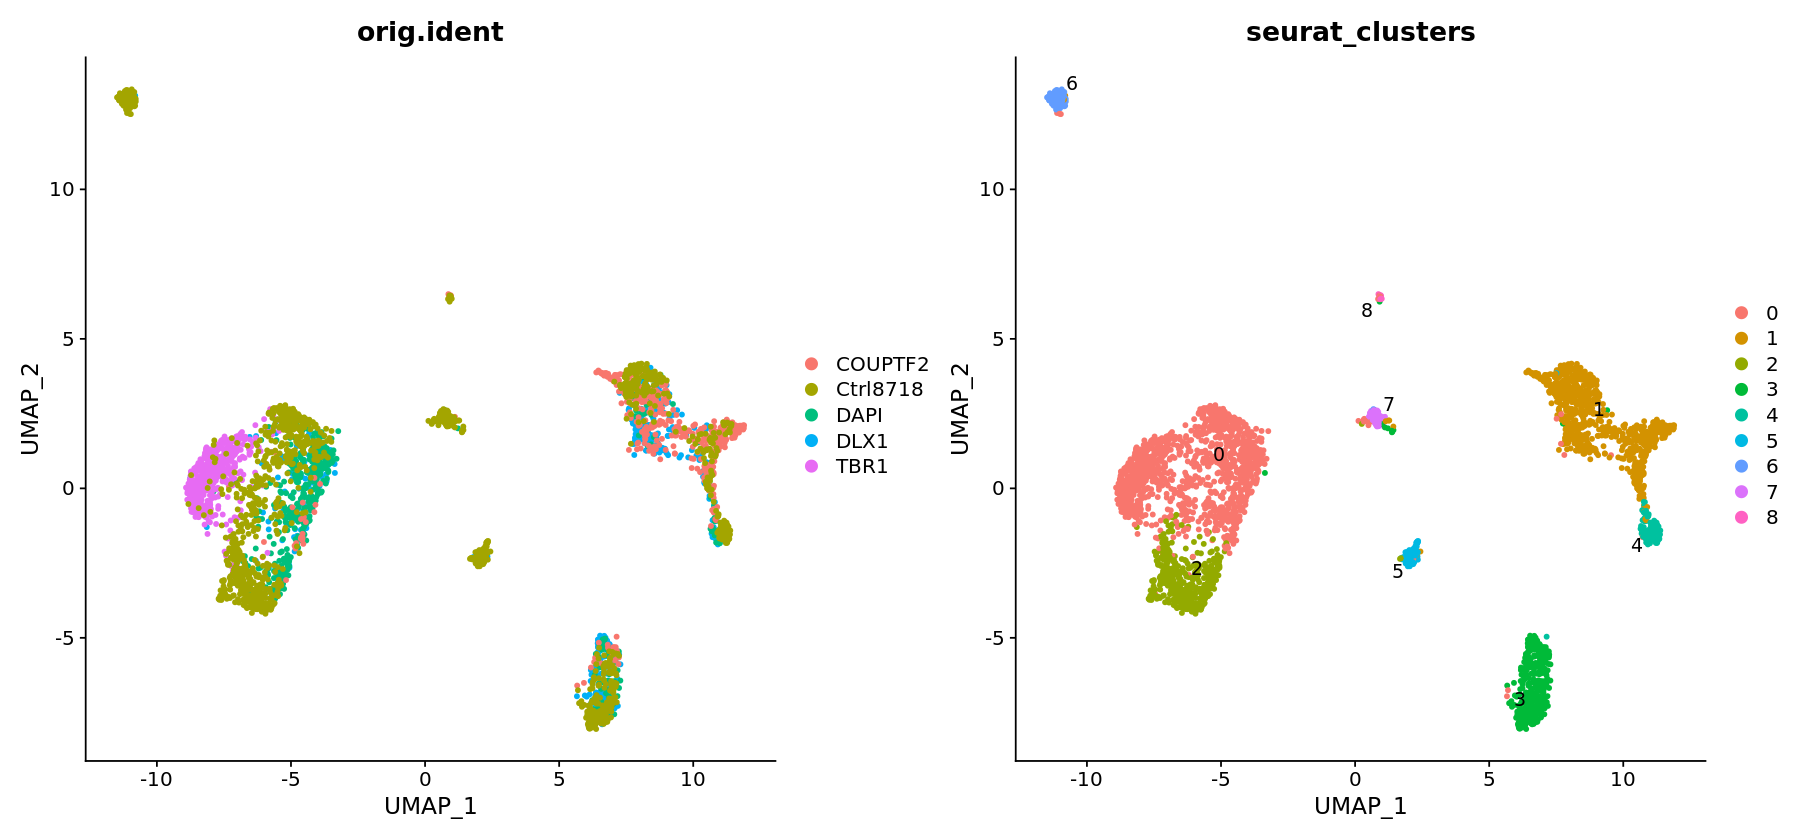

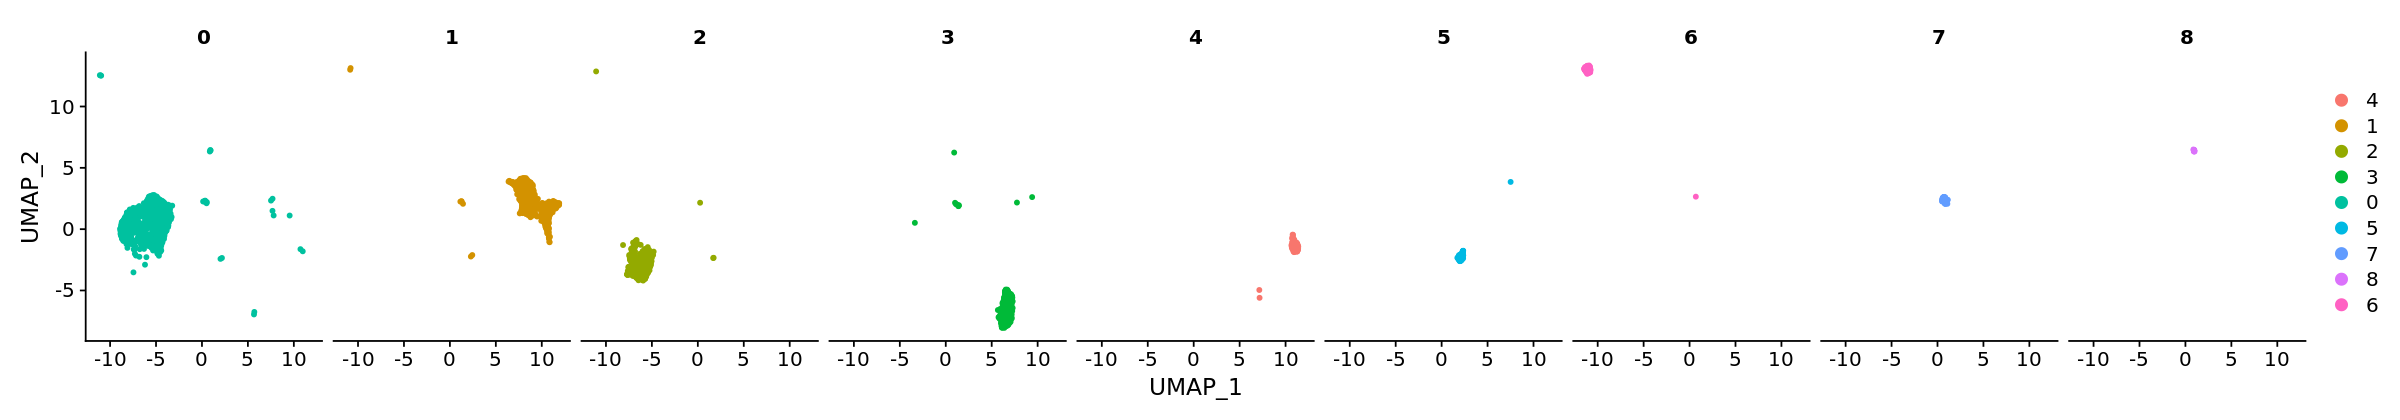

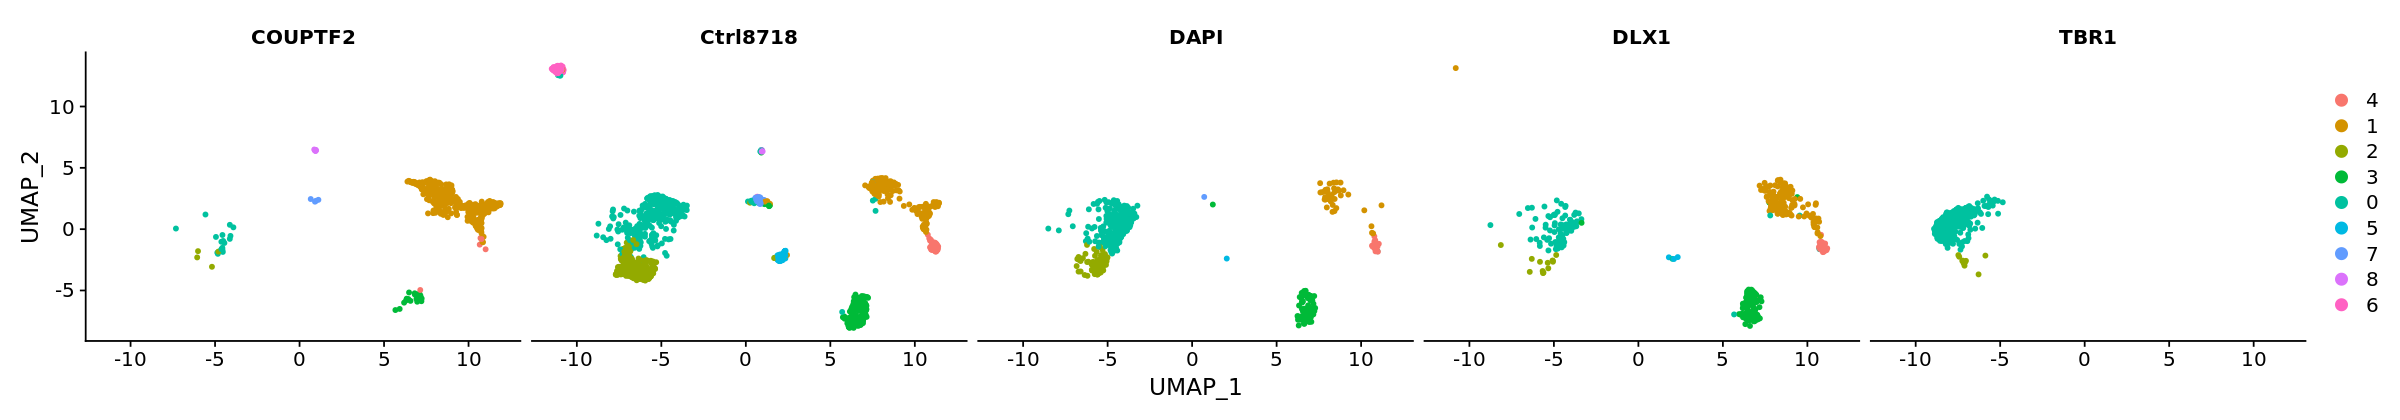

In [6]:
Idents(df1)<-"seurat_clusters"
p1 <- DimPlot(df1, reduction = "umap", group.by = "orig.ident",pt.size = 1)
p2 <- DimPlot(df1, reduction = "umap", group.by = "seurat_clusters", label = TRUE, repel = TRUE,pt.size = 1)
options(repr.plot.width=15, repr.plot.height=7)
p1 + p2
options(repr.plot.width=20, repr.plot.height=3.5)
DimPlot(df1, reduction = "umap", split.by = "seurat_clusters",pt.size = 1)
DimPlot(df1, reduction = "umap", split.by = "orig.ident",pt.size = 1)

In [71]:
hvg <- VariableFeatures(df1)

rm(plist)
plist <- FeaturePlot(df1,
                     slot = 'data',
                     pt.size = 1,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('RBFOX3','SYT1','CAMK2A','CUX2','SATB2','RORB','TLE4',
                               'DLX1','GAD1','GAD2','NR2F2','GRIN2D','GRIK1','RELN',
                               'GFAP','SLC1A2','SLC1A3',
                               'OLIG1','OLIG2','MOBP','PLP1','CLDN11','PDGFRA'
                               
                           
                       ))

In [72]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) 
                #NoLegend() + 
                #NoAxes()
}

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

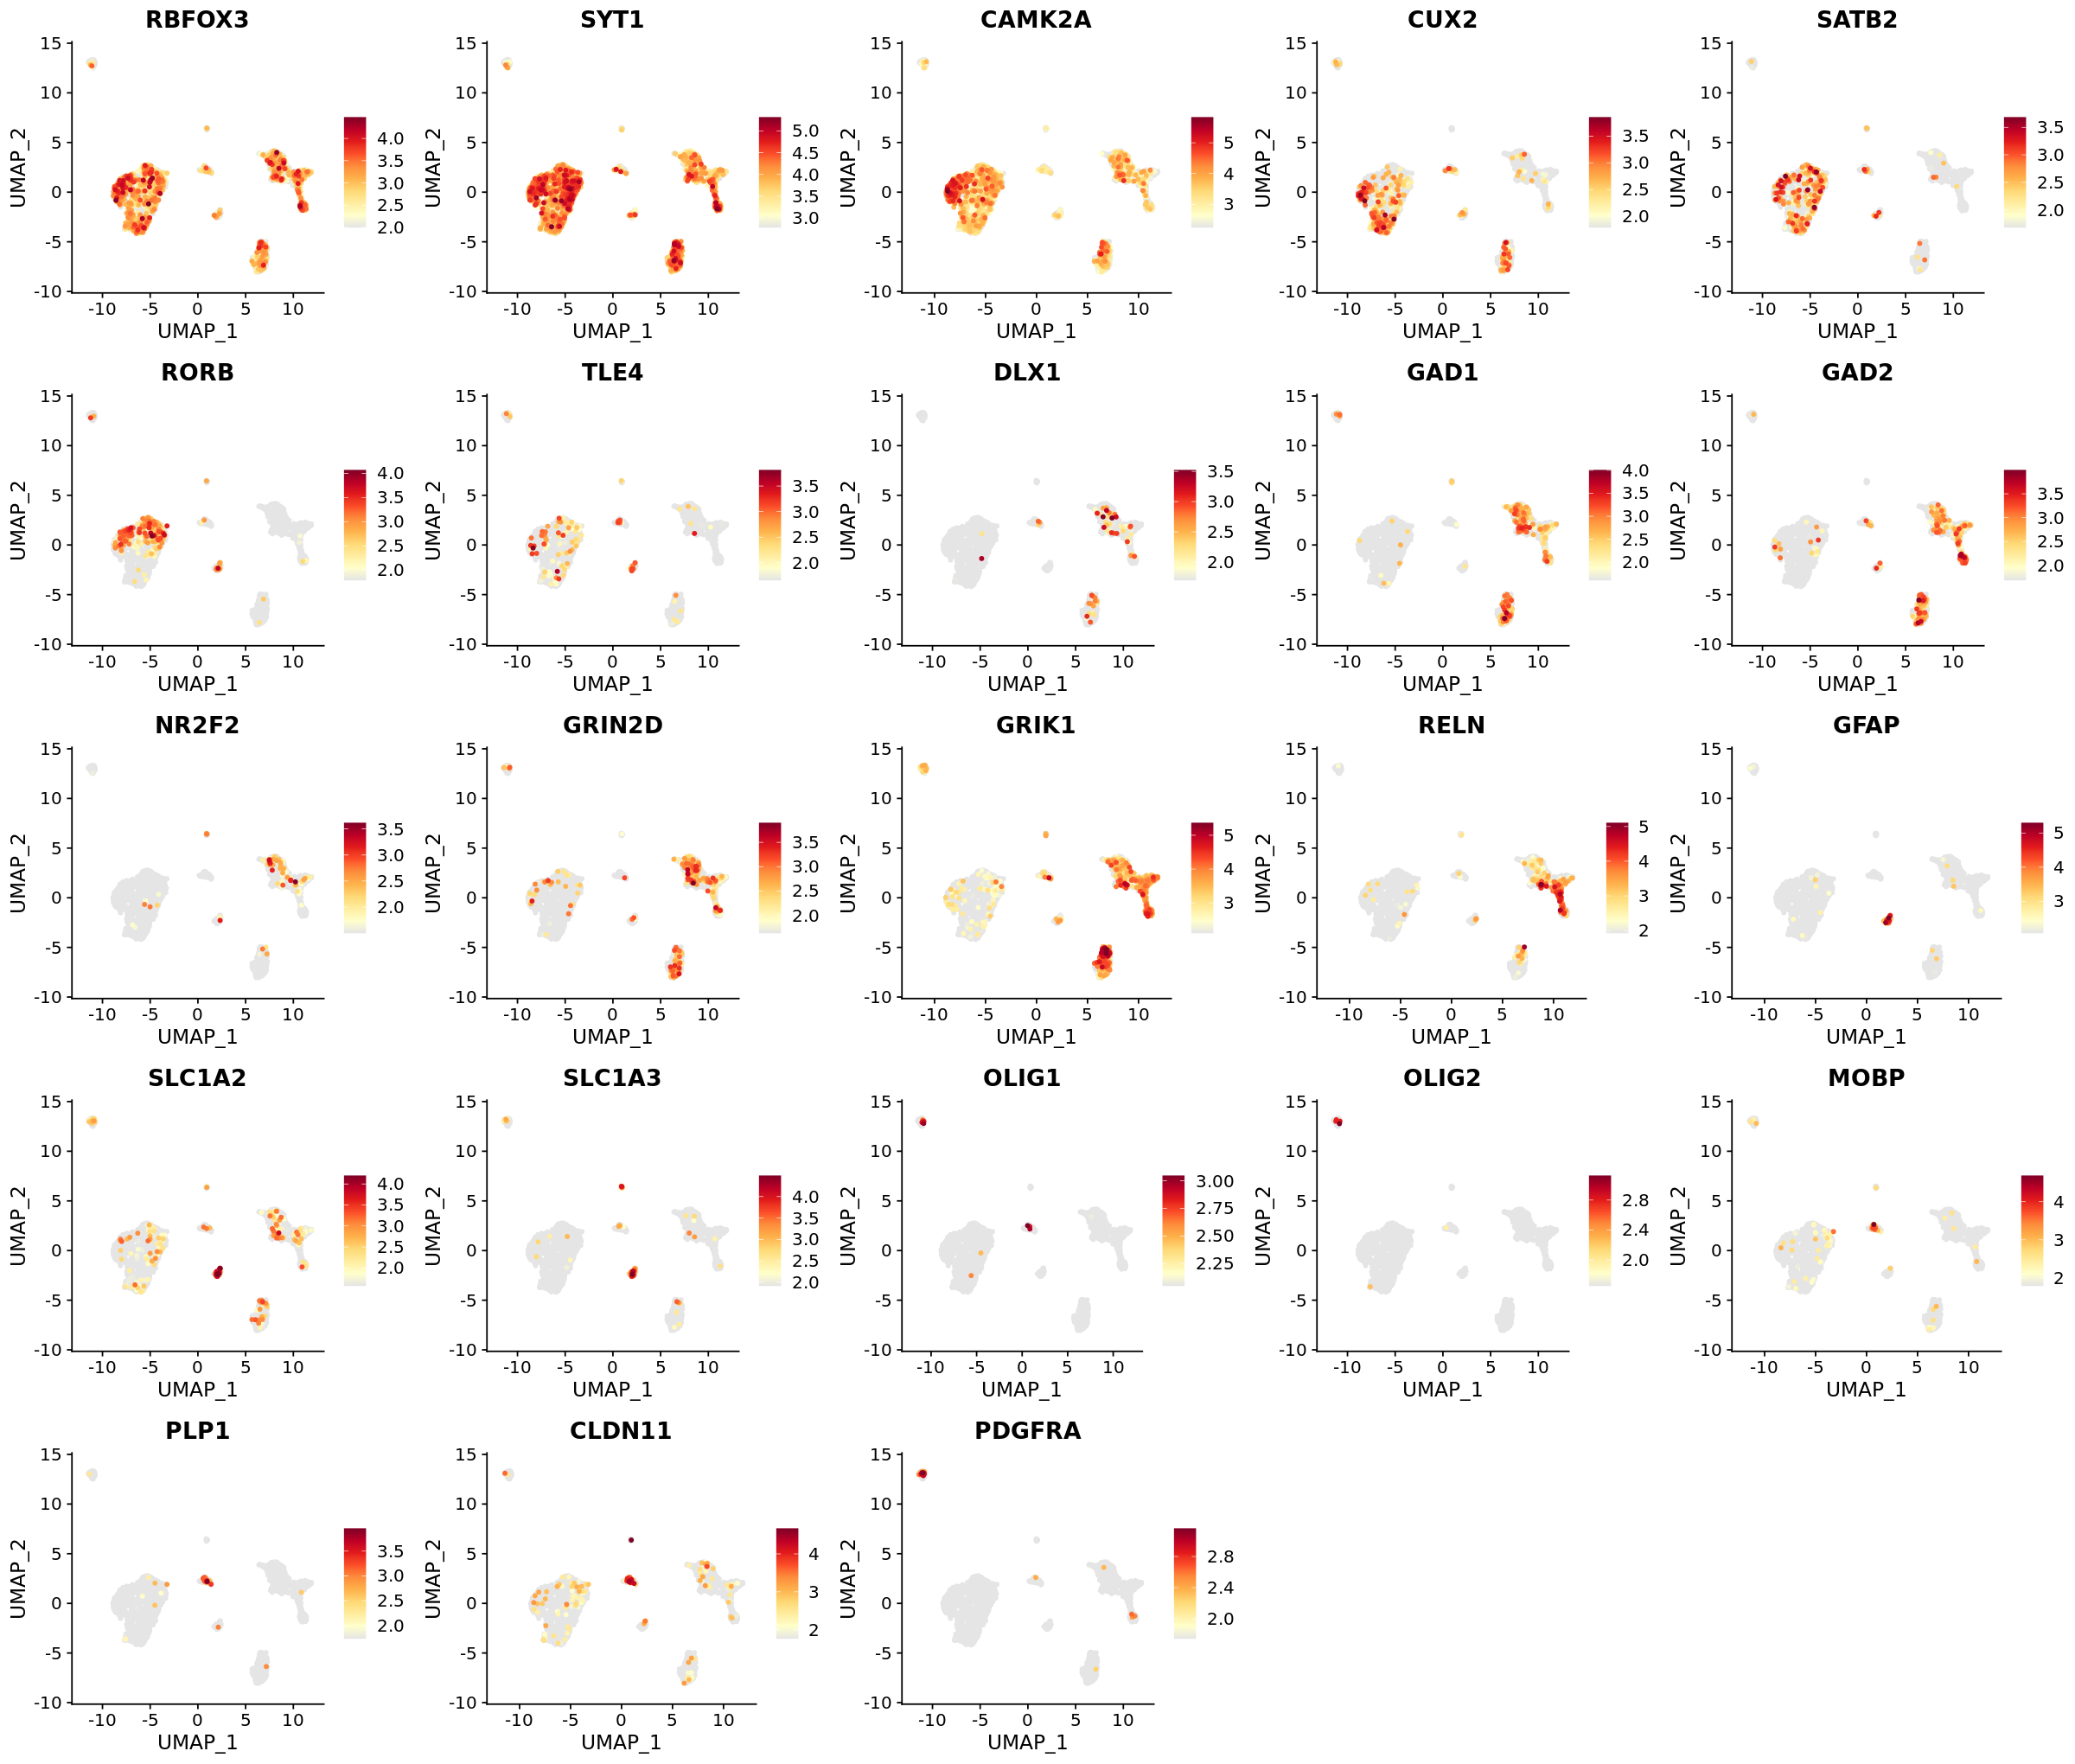

In [74]:
options(repr.plot.width=20, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)

In [75]:
pdf(file = "Marker_UMAP.pdf", width = 20, height = 17);
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

In [3]:
df1<-readRDS("SeuratObject.rds")

In [10]:
df1@meta.data$seurat_clusters<-as.character(df1@meta.data$seurat_clusters)
tmp <- table(df1@meta.data$seurat_clusters, df1@meta.data$orig.ident) 
tmp_col<-colSums(tmp)
len<-length(unique(df1@meta.data$seurat_clusters))
unique(df1@meta.data$orig.ident)
unique(df1@meta.data$seurat_clusters)

[1] "DLX1"     "DAPI"     "COUPTF2"  "TBR1"     "Ctrl8718"

[1] "4" "1" "2" "3" "0" "5" "7" "8" "6"

In [11]:
tmp

   
    COUPTF2 Ctrl8718 DAPI DLX1 TBR1
  0      19      402  296   86  459
  1     375      212   38  163    0
  2       4      327   85   13   11
  3      22      183   73  125    0
  4       5       66   16   32    0
  5       0       95    1    3    0
  6       0       98    0    0    0
  7       4       88    1    0    0
  8      11        9    0    0    0

In [8]:
tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]
#tmp[1:len,3]<-tmp[1:len,3]/tmp_col[3]
tmp<-as.data.frame(tmp)

In [9]:
tmp

Var1,Var2,Freq
<fct>,<fct>,<dbl>
0,COUPTF2,4.318182e-02
1,COUPTF2,8.522727e-01
2,COUPTF2,9.090909e-03
3,COUPTF2,5.000000e-02
4,COUPTF2,1.136364e-02
5,COUPTF2,0.000000e+00
6,COUPTF2,0.000000e+00
7,COUPTF2,9.090909e-03
8,COUPTF2,2.500000e-02


In [30]:
colnames(tmp) <- c('cluster', 'orig.ident','freq')

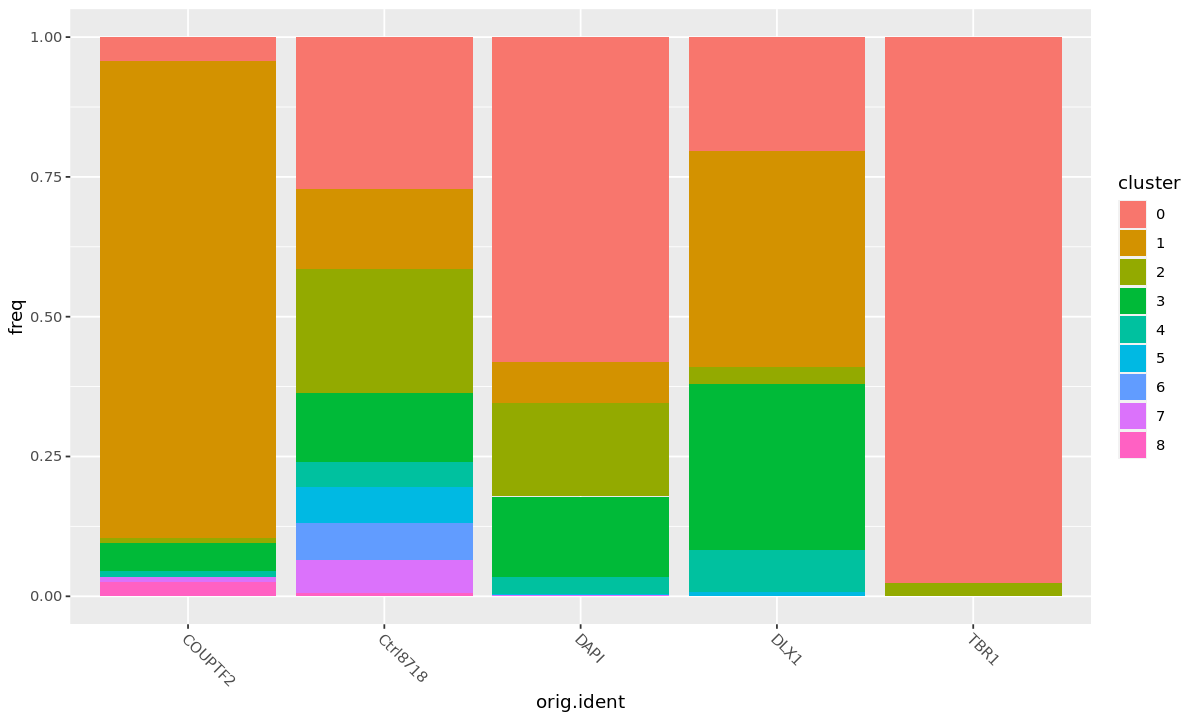

In [31]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(tmp, aes(fill=cluster, y=freq, x=orig.ident)) + 
    geom_bar(position="fill", stat="identity")+theme(axis.text.x=element_text(angle = -45, hjust = 0))

# DEG

In [32]:
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df1,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session



In [33]:
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

In [34]:
DEX <- DEX[!(duplicated(DEX$gene)),]

In [35]:
top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

In [36]:
pdf(file = "DEX.pdf", width = 5, height = 4, useDingbats = F);
DoHeatmap(df1,
          disp.min = -1,
          disp.max = 1,
           slot = 'scale.data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

In [37]:
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="0"] <- "ExN"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="1"] <- "InN"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="2"] <- "ExN"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="3"] <- "InN"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="4"] <- "InN"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="5"] <- "Ast"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="6"] <- "OPC"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="7"] <- "OL"
df1@meta.data$cell_type[df1@meta.data$seurat_cluster=="8"] <- "U"

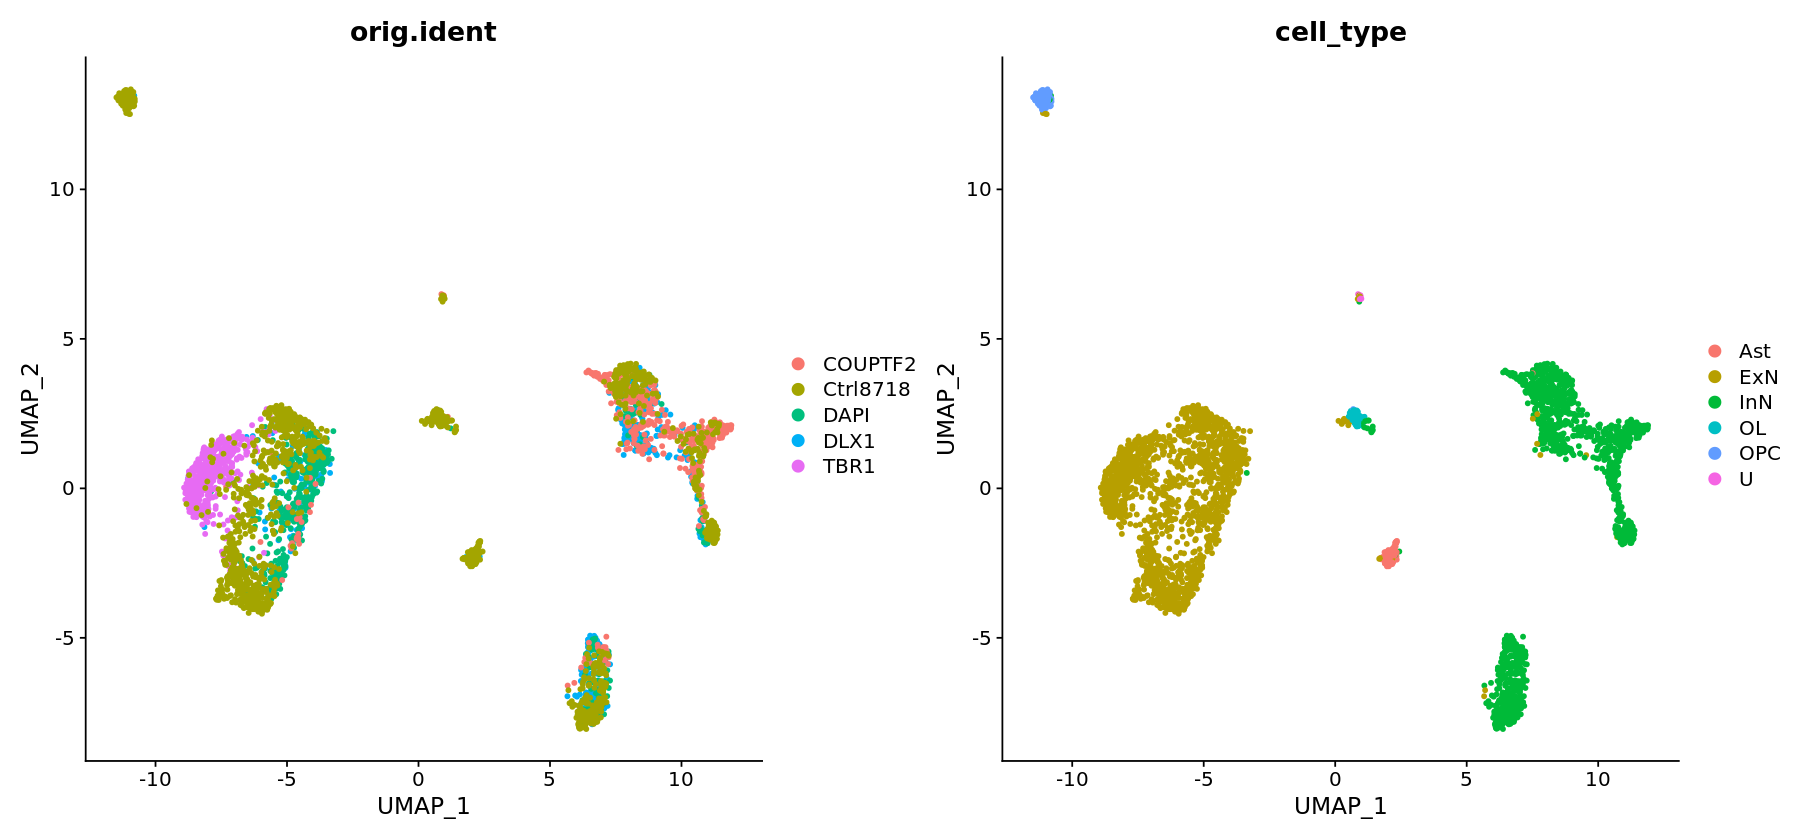

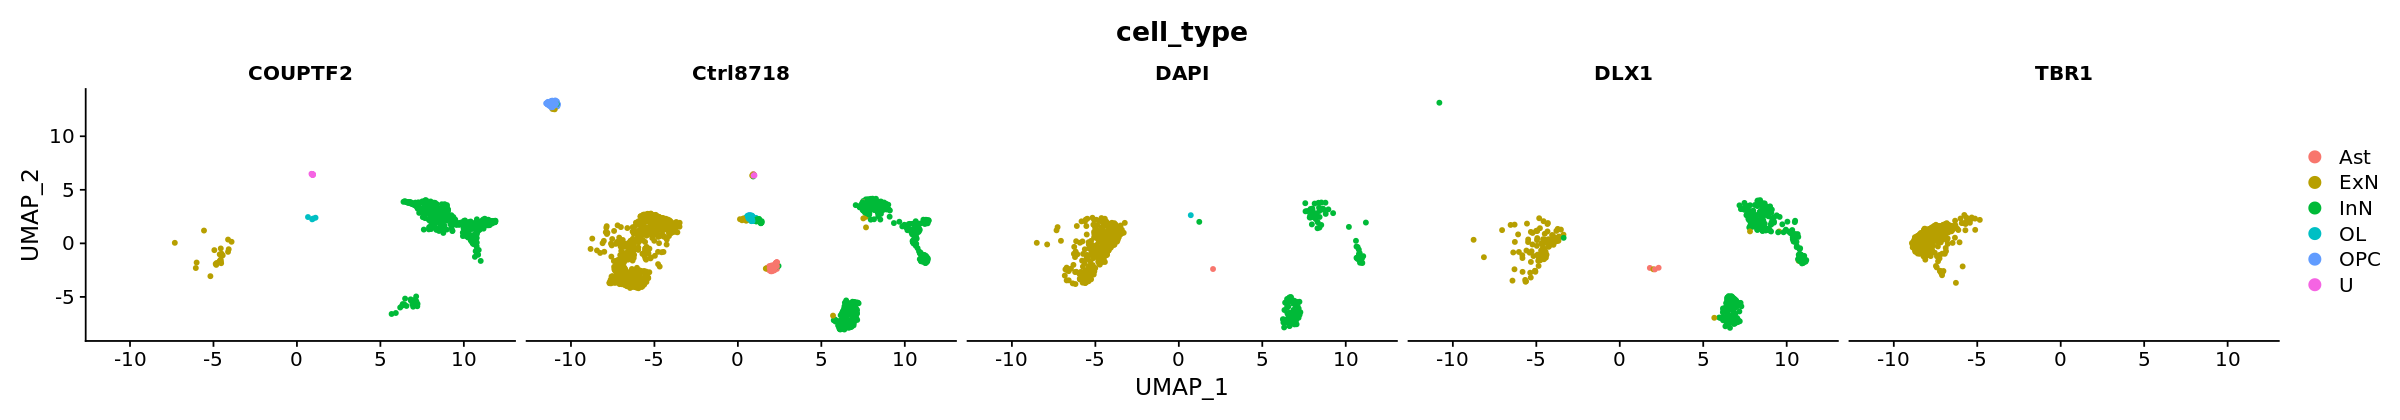

In [38]:
p1 <- DimPlot(df1, reduction = "umap", group.by = "orig.ident",pt.size = 1)
p2 <- DimPlot(df1, reduction = "umap", group.by = "cell_type",pt.size = 1)
options(repr.plot.width=15, repr.plot.height=7)
p1 + p2
options(repr.plot.width=20, repr.plot.height=3.5)
DimPlot(df1, reduction = "umap", split.by = "orig.ident", group.by="cell_type",pt.size = 1)

In [39]:
pdf(file = "UMAP.pdf", width = 15, height = 7, useDingbats = F);
p1 + p2
dev.off()

png 
  2

In [40]:
df1@meta.data$cell_type<-as.character(df1@meta.data$cell_type)
tmp <- table(df1@meta.data$cell_type, df1@meta.data$orig.ident) 
tmp_col<-colSums(tmp)
len<-length(unique(df1@meta.data$cell_type))
unique(df1@meta.data$orig.ident)
unique(df1@meta.data$cell_type)

[1] "DLX1"     "DAPI"     "COUPTF2"  "TBR1"     "Ctrl8718"

[1] "InN" "ExN" "Ast" "OL"  "U"   "OPC"

In [41]:
tmp

     
      COUPTF2 Ctrl8718 DAPI DLX1 TBR1
  Ast       0       95    1    3    0
  ExN      23      729  381   99  470
  InN     402      461  127  320    0
  OL        4       88    1    0    0
  OPC       0       98    0    0    0
  U        11        9    0    0    0

In [42]:
tmp<-as.data.frame(tmp)

In [43]:
colnames(tmp) <- c('cluster', 'orig.ident','freq')

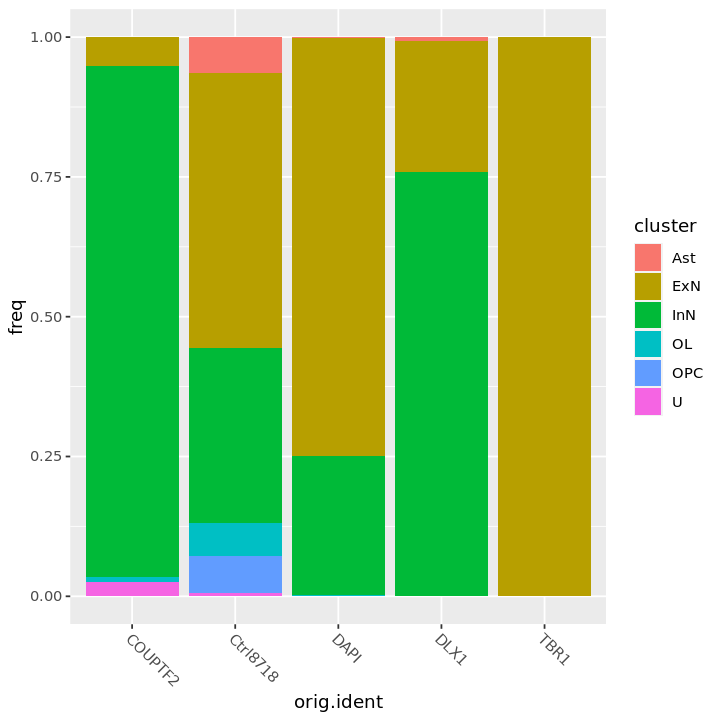

In [44]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(tmp, aes(fill=cluster, y=freq, x=orig.ident)) + 
    geom_bar(position="fill", stat="identity")+theme(axis.text.x=element_text(angle = -45, hjust = 0))

In [45]:
pdf(file = "Cell_type_proportion.pdf", width = 6, height = 6, useDingbats = F);
ggplot(tmp, aes(fill=cluster, y=freq, x=orig.ident)) + 
    geom_bar(position="fill", stat="identity")+theme(axis.text.x=element_text(angle = -45, hjust = 0))
dev.off()

png 
  2

# Marker expression

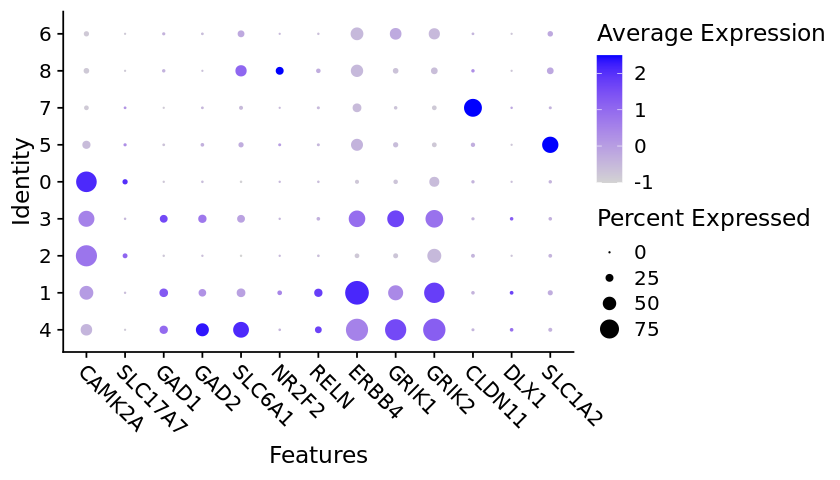

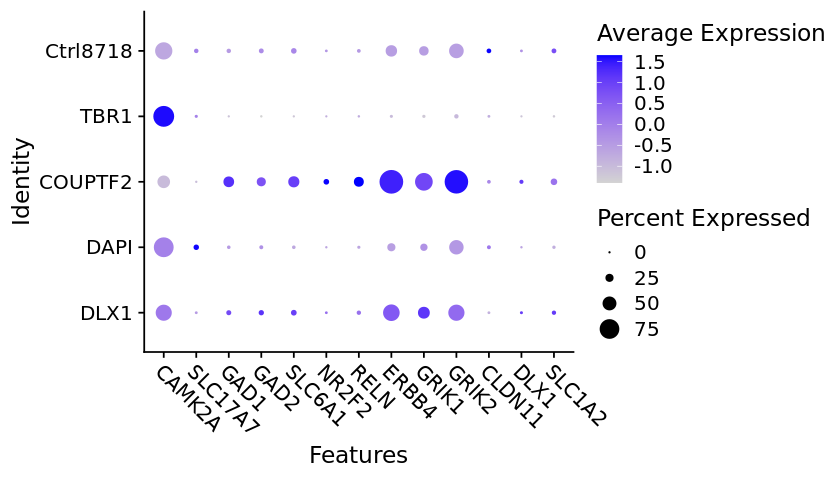

In [46]:
Idents(df1)<-"seurat_clusters"
p<- DotPlot(object = df1, features = c('CAMK2A','SLC17A7','GAD1','GAD2','SLC6A1','NR2F2','RELN','ERBB4','GRIK1','GRIK2','CLDN11','DLX1','SLC1A2')
           )
options(repr.plot.width=7, repr.plot.height=4)
p+theme(axis.text.x=element_text(angle = -45, hjust = 0))

Idents(df1)<-"orig.ident"
p<- DotPlot(object = df1, features = c('CAMK2A','SLC17A7','GAD1','GAD2','SLC6A1','NR2F2','RELN','ERBB4','GRIK1','GRIK2','CLDN11','DLX1','SLC1A2')
           )
options(repr.plot.width=7, repr.plot.height=4)
p+theme(axis.text.x=element_text(angle = -45, hjust = 0))

In [47]:
pdf(file = "GE_dotplot_sorted_group.pdf", width = 7, height = 4, useDingbats = F);
p+theme(axis.text.x=element_text(angle = -45, hjust = 0))
dev.off()

png 
  2

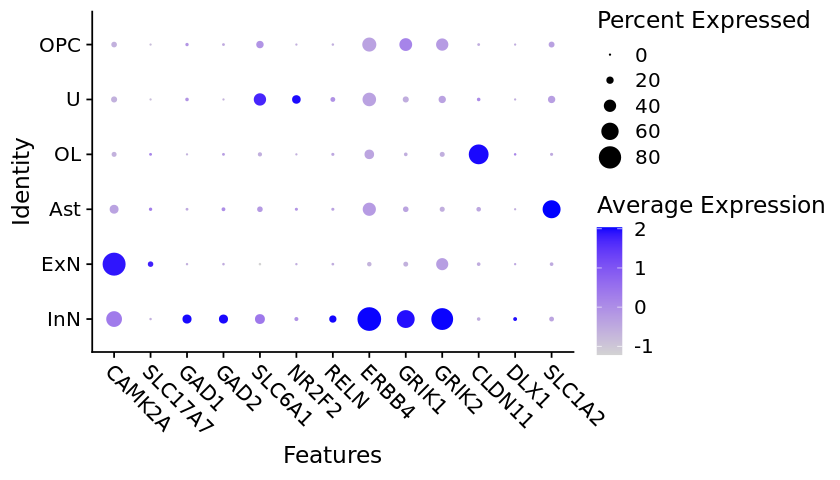

In [48]:
Idents(df1)<-"cell_type"

p<- DotPlot(object = df1, features = c('CAMK2A','SLC17A7','GAD1','GAD2','SLC6A1','NR2F2','RELN','ERBB4','GRIK1','GRIK2','CLDN11','DLX1','SLC1A2')
           )
options(repr.plot.width=7, repr.plot.height=4)
p+theme(axis.text.x=element_text(angle = -45, hjust = 0))

In [49]:
pdf(file = "GE_dotplot_celltype.pdf", width = 7, height = 4, useDingbats = F);
p+theme(axis.text.x=element_text(angle = -45, hjust = 0))
dev.off()

png 
  2

In [50]:
saveRDS(df1,"SeuratObject.rds")

# DEG

In [81]:
Idents(df1)<-"orig.ident"

plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df1,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

In [82]:
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

In [83]:
DEX <- DEX[!(duplicated(DEX$gene)),]

In [84]:
top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

In [85]:
pdf(file = "DEX_ident.pdf", width = 5, height = 4, useDingbats = F);
DoHeatmap(df1,
          disp.min = -1,
          disp.max = 1,
           slot = 'scale.data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2